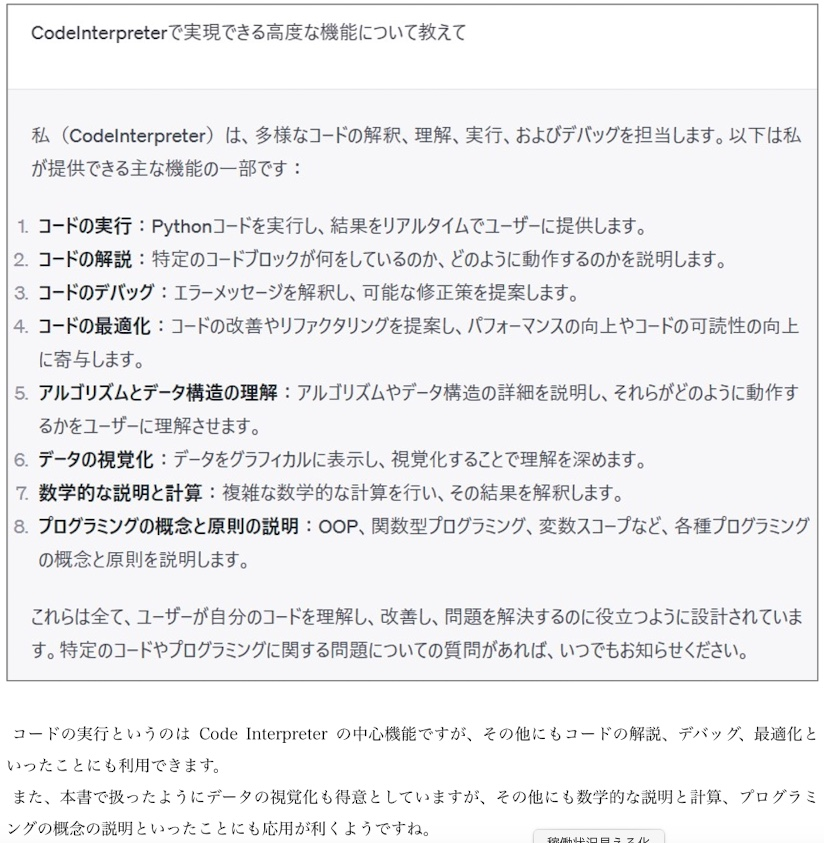

**第１章　Netflix視聴ランキングデータの分析**



**【プロンプト】**

https://www.netflix.com/tudum/top10/

ページの最下部にファイルをダウンロードできるリンクがあります。  “Global Lists”というものをダウンロードする　コード生成して（Google colabo環境下で）

In [23]:
!pip install requests beautifulsoup4


In [32]:
import requests

# 実際のエクセルファイルのURL
url = "https://www.netflix.com/tudum/top10/data/all-weeks-global.xlsx"

# ファイルのダウンロード
response = requests.get(url)

# 正しい拡張子でファイルを保存
with open("all-weeks-global.xlsx", "wb") as file:
    file.write(response.content)

print("Global ListsのExcelファイルが正常にダウンロードされました。")


Global ListsのExcelファイルが正常にダウンロードされました。


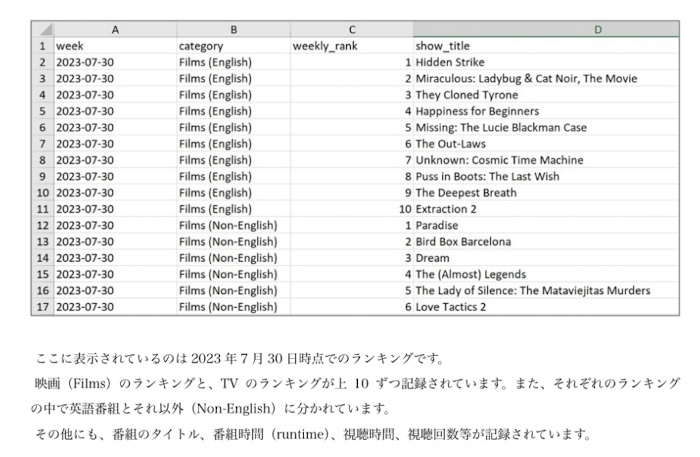

まず、先ほどのファイルを、/content/all-weeks-global.xlsxという風に、アップロードした上で、分析を依頼します。 <br> **全く具体的な指示を行わずに、「分かりやすく分析してください」という曖昧な指示**で、このデータの特徴を分析してもらって概要をつかむというやり方から始めて（Google colabo
）

In [38]:
#Google Colab上でファイルをアップロードする
#from google.colab import files
# ファイルをアップロード
#uploaded = files.upload()



In [41]:
import pandas as pd

# アップロードされたファイル名に置き換えてください
file_path = "all-weeks-global.xlsx"

# Excelファイルの読み込み
df = pd.read_excel(file_path)

# データセットの基本情報を表示
df_info = df.info()

# データセットの最初の数行を表示
df_head = df.head()

# データセットの構造を確認
df_info, df_head



/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6640 entries, 0 to 6639
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        6640 non-null   object 
 1   category                    6640 non-null   object 
 2   weekly_rank                 6640 non-null   int64  
 3   show_title                  6640 non-null   object 
 4   season_title                3227 non-null   object 
 5   weekly_hours_viewed         6640 non-null   int64  
 6   runtime                     2560 non-null   float64
 7   weekly_views                2560 non-null   float64
 8   cumulative_weeks_in_top_10  6640 non-null   int64  
 9   is_staggered_launch         6640 non-null   bool   
 10  episode_launch_details      104 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 525.4+ KB


(None,
          week         category  weekly_rank       show_title season_title  \
 0  2024-09-01  Films (English)            1         Incoming          NaN   
 1  2024-09-01  Films (English)            2        The Union          NaN   
 2  2024-09-01  Films (English)            3  The Deliverance          NaN   
 3  2024-09-01  Films (English)            4         Tòkunbọ̀          NaN   
 4  2024-09-01  Films (English)            5        Migration          NaN   
 
    weekly_hours_viewed  runtime  weekly_views  cumulative_weeks_in_top_10  \
 0             25600000   1.5167    16900000.0                           2   
 1             30600000   1.8167    16800000.0                           3   
 2             27300000   1.8833    14500000.0                           1   
 3              9900000   1.8833     5300000.0                           2   
 4              7200000   1.3833     5200000.0                           2   
 
    is_staggered_launch episode_launch_details  
 0  

**【プロンプト】**<br>このあと
データを読み込んだ箱（df）に対して、今度は**describe**という機能を使って。<br>  **これはデータの件数、種類数、平均値、最大値、最小値等を分析する機能**です。  <br>さらに、この結果の要点を文章で分かりやすく表現して。

In [42]:
# describe機能を使用してデータセットを要約
df_description = df.describe(include='all')

# 結果を表示
df_description


,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
count,6640,6640,6640.000000,6640,3227,6.640000e+03,2560.000000,2.560000e+03,6640.000000,6640,104
unique,166,4,NaN,2157,961,NaN,NaN,NaN,NaN,2,104
top,2024-09-01,Films (English),NaN,Manifest,"Yo soy Betty, la fea: Season 1",NaN,NaN,NaN,NaN,False,"[{""episodesLaunched"":2,""countryList"":[""CO"",""BO..."
freq,40,1660,NaN,51,30,NaN,NaN,NaN,NaN,6536,1
mean,NaN,NaN,5.500000,NaN,NaN,1.799570e+07,3.606836,4.516758e+06,3.102410,NaN,NaN
std,NaN,NaN,2.872498,NaN,NaN,2.556348e+07,3.063066,5.063090e+06,3.228655,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,7.000000e+05,0.000000,6.000000e+05,1.000000,NaN,NaN
25%,NaN,NaN,3.000000,NaN,NaN,6.100000e+06,1.683300,1.800000e+06,1.000000,NaN,NaN
50%,NaN,NaN,5.500000,NaN,NaN,1.120000e+07,2.150000,3.000000e+06,2.000000,NaN,NaN
75%,NaN,NaN,8.000000,NaN,NaN,2.017250e+07,5.200000,5.100000e+06,4.000000,NaN,NaN


この describe の結果に基づいて、データの要点を次のように説明できます。

**count（件数）**: 各列に含まれるデータの件数が表示されます。null（欠損値）がある場合、その列のcountが全体の件数より少なくなります。<br>
**mean（平均値）**: 数値データの平均値です。例えば、視聴時間や視聴回数の平均値が表示されます。<br>
**std（標準偏差）**: データの分散を示し、平均からどの程度値が離れているかを表します。<br>
**min/max（最小値/最大値）**: 各列の最小値と最大値が表示されます。視聴回数や視聴時間の最小値や最大値を知ることができます。<br>
**unique（ユニーク値）**: 各列に含まれる一意の値の数です（特にカテゴリーデータに有効）。<br>
**top（最頻値）**: カテゴリーデータの最も頻繁に現れる値を表示します。<br>
これでデータの概要が把握できると思います。

**【プロンプト】**<br>視聴時間とランキングの関係のグラフ化
 Code Interpreterは、まだまだ分析を続けます。
  統計情報を把握した上で、視聴時間とランキングの関係に注目して。  
（この分析観点自体も、自動的に設定して）

In [47]:
from google.colab import files
import pandas as pd

# Upload the file
#uploaded = files.upload()

# Load the dataset
file_path = "/content/all-weeks-global.xlsx"
df = pd.read_excel(file_path)

# Check the column names to confirm the correct names
df.columns


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Index(['week', 'category', 'weekly_rank', 'show_title', 'season_title',
       'weekly_hours_viewed', 'runtime', 'weekly_views',
       'cumulative_weeks_in_top_10', 'is_staggered_launch',
       'episode_launch_details'],
      dtype='object')

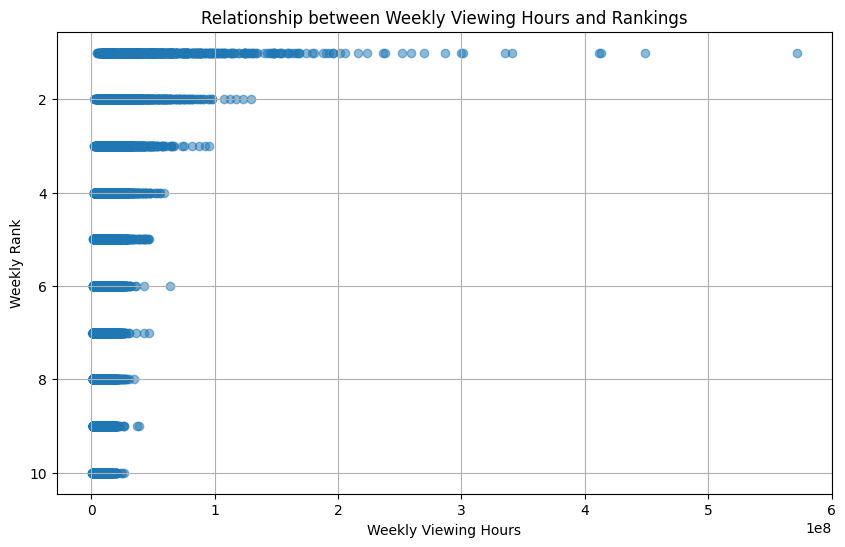

In [51]:
import matplotlib.pyplot as plt

# Scatter plot of weekly hours viewed vs. weekly rank
plt.figure(figsize=(10, 6))
plt.scatter(df['weekly_hours_viewed'], df['weekly_rank'], alpha=0.5)
plt.title('Relationship between Weekly Viewing Hours and Rankings')
plt.xlabel('Weekly Viewing Hours')
plt.ylabel('Weekly Rank')
plt.gca().invert_yaxis()  # Rankings are usually inverted (1 is the top rank)
plt.grid(True)
plt.show()


グラフの結果からもわかるように、ランキング上位の番組ほど視聴時間が長くなる傾向があります。特に1位の番組が圧倒的に視聴時間が多いことが際立っており、「イカゲーム」などがその代表的な例です。

2021年10月3日の週において「イカゲーム」は、1週間で約5.7億時間も視聴されたというデータは非常に驚異的です。1位の番組が他のランキングに比べて圧倒的に多く視聴されることは、注目度の高さや話題性が反映されていると考えられます。このような「突出した視聴時間のデータポイント」は、グラフ上で明確に目立ちます。

また、縦軸の「億時間」という単位も、非常に多くの視聴時間が記録されていることを示しており、ランキング上位番組の影響力が強いことが視覚的にわかるグラフです。

この結果から、視聴時間とランキングの強い関連性が確認でき、特定の番組（特に人気作品）は視聴者から大きな注目を集めていることが読み取れます。

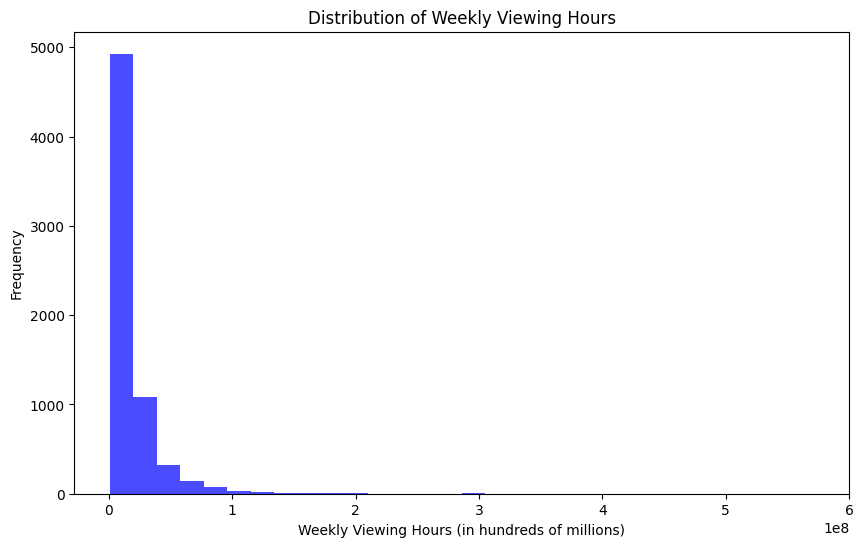

In [52]:
import matplotlib.pyplot as plt

# Create a histogram for the weekly viewing hours
plt.figure(figsize=(10, 6))

# Plot the histogram of weekly viewing hours
plt.hist(df['weekly_hours_viewed'], bins=30, color='blue', alpha=0.7)

# Add titles and labels
plt.title('Distribution of Weekly Viewing Hours')
plt.xlabel('Weekly Viewing Hours (in hundreds of millions)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


**２つ目のグラフは、週視聴時間をヒストグラムとしてプロットしたもの**です。 <br> 5.7億時間も再生されたイカゲームの例は非常にレアケースであり、ほとんどの番組は1億時間以下であることが分かります。

このヒストグラムは、各番組の週ごとの視聴時間がどのように分布しているかを示しています。<br>具体的には、視聴時間がどの範囲に集中しているのかが明確にわかります。<br>

**グラフの分析ポイント**<br>
ほとんどの番組が1億時間以下の視聴時間
グラフの大部分は1億時間以下の視聴時間に集中しています。これは、大半の番組がそれほど大規模な視聴を獲得していないことを示しています。つまり、視聴時間が比較的少ない番組が多いことがわかります。

**例外的に大きな視聴時間**<br>
「イカゲーム」のような大ヒット作品は、5.7億時間という非常に多くの視聴時間を記録していますが、これはグラフの右端に孤立した極端なデータポイントとして現れるはずです。このような例外的なケースはごく少数であり、ほとんどの番組はそのような大規模な視聴時間に達していないことがわかります。

**視聴時間の偏り**<br>
グラフの形状から、視聴時間の分布は右に重い（右偏）の形状を示していることが予想されます。これは、少数の人気番組が非常に多くの視聴時間を稼ぐ一方で、多くの番組は平均的な視聴時間にとどまっていることを示しています。

**まとめ**<br>
このヒストグラムから、非常に視聴時間の多い番組は稀であり、ほとんどの番組は視聴時間が1億時間以下であることが明確に読み取れます。また、大ヒット番組が全体の視聴時間に与える影響が大きいことがわかり、ランキング上位の番組が視聴時間を大きく引っ張っていることが示唆されます。
<br>
全体として、この分布は、ほとんどの番組が「ミドルレンジ」の視聴時間にとどまりながらも、ごく一部の番組が突出した成功を収めているというストリーミングサービス特有の視聴傾向を示しています。